In [1]:
import os

# longitudonal_sequences_folder  = r'/Users/shefali/Dropbox/Research/HIVEpistatic/all_longitudinal_data'
# filenames = [] 
# for filename in os.listdir(longitudonal_sequences_folder ):
#     if filename.endswith(".fasta"):
#         file = os.path.join(longitudonal_sequences_folder, filename)
#         filenames.append(file)
#     else:
#         continue
        
# len(filenames) # to check number of files:  ls -1 [directory] | wc -l

filenames = [r'/Users/shefali/Dropbox/Research/HIVEpistatic/hivdb_subtypeB_rt_reference_aligned.fasta']

In [6]:
def getSequences(filename):
    sequences = []
    patient_info = []
    file = open(filename).read()
    lines = file.split("\n")
    patient_num = -1
    for line in lines:
        if ">" in line:
            patient_info.append(line)
            patient_num += 1
        elif line:  # check not empty
            line = line.replace("-", "N")
            line = line.replace("~", "N")
            if len(sequences) == patient_num:
                sequences.append(line)
            else:
                sequences[patient_num] += line
                
    return [patient_info, sequences]

# # usage
info, seqs = getSequences(filenames[0])
# if first sequence is reference
info, seqs = info[1:], seqs[1:]

print(len(info), len(seqs))

lengths = set([len(seq) for seq in seqs])
print(lengths)
    
# # Confirm correct parsing
for i in range(3):
    print(info[i])
    print(seqs[i])

72200 72200
{1690}
>1007_15020_ARCH014_1998_B__None
CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAATGGATGGCCCAAAAGTTAAACAATGGCCATTGACAGAAGAAAAAATAAAAGCATTAACAGAAATATGTACAGAAATGGAAAAAGAAGGAAAAATTTCAAAAATTGGGCCTGAAAACCCATACAATACTCCAGTATTTGCCATAAAGAAAAAAGACAGTACCAAATGGAGGAAATTAGTAGATTTCAGAGAACTTAATAAAAGAACTCAAGATTTTTGGGAGGTTCAATTAGGAATACCGCACCCGGCAGGGTTAAAAAAGAAAAAATCAGTAACAGTACTGGATGTGGGGGATGCATATTTTTCAGTCCCCTTAGATAAGGATTTCAGGAAGTACACTGCATTTACCATACCTAGTGTCAACAATGAGACACCAGGAATTAGGTACCAGTACAATGTGCTTCCACAGGGATGGAAAGGATCACCAGCAATATTCCAAAGCAGCATGATAAAGATCTTAGAGCCTTTTAGAAAACAAAATCCGGACATAGTTATCTATCAATACATGGATGATTTGTATGTAGGATCTGACTTAGAAATAGGGCAGCATAGAACAAAAATAGAGGAACTGAGACAACATCTGTTAAGGTGGGGATTTACCACACCAGACAAAAAACATCAGAAAGAACCTCCATTTCTTTGGATGGGTTATGAACTCCATCCTGATAAATGGACAGTACAGCCTATAATGCTGCCAGAAAAAGATAGCTNGGACTGTCAATGACATACANNGAAATTAGTGGGAAAATTAAATTGGGCAAGTCAGATTTATCCAGGGATTNAAAGTAAGGCAGTTATGTAAACTCCTTAGGGGAACCAAAGCACTAACGGAAGTAGTACCACTAACANNGAAGAAGCANNGAGNNCTAGAACTGGCAGAAAACAGGGAGATTCTAAAAGAACC

In [7]:
# ! pip install biopython

In [14]:
from Bio.Seq import Seq

def amino_translate(sequence, filename):
    coding_dna = Seq(sequence)
    protien_sequence = coding_dna.translate(stop_symbol="@") #set to_stop=True to translate until reaching stop codon
    # if "@" in protien_sequence:
        # print("FOUND STOP CODON IN FILE: ", filename, "SEQUENCE: ", str(protien_sequence), "\n\n")
    return protien_sequence

In [16]:
# write back to new file with protien sequence 
import sys
import Bio.Data.CodonTable as table

def nucleotide_to_amino_file(filename, outputDir):
    
    info, seqs = getSequences(filename)
    # if first sequence is reference
    info, seqs = info[1:], seqs[1:]

    if len(info) != len(seqs):
        print("parsing error")
        print(info, seqs)
    
    path_to_file = os.path.splitext(filename)[0]
    simple_filename = path_to_file.split("/")[-1]
    
    out = open(outputDir + "/" + simple_filename + "_amino.fasta", "w")

    current = 0
    num_errors = 0
    num_stop_codons = 0
    
    for i in range(len(info)):
        try:
            current = i
            amino_seq = str(amino_translate(seqs[i], filename))
            if "@" in amino_seq:
                num_stop_codons += 1
                continue
            out.write(info[i])
            out.write("\n")
            out.write(amino_seq) 
            out.write("\n")
        except table.TranslationError as err:
            # typically unknown characters
            num_errors += 1
            # print("Excluding sequence, error on: ", err, filename, seqs[current], "\n\n\n")
    out.close()
    print("Number of files with stop codons:", num_stop_codons, "Number of errors", num_errors)

for filename in filenames:
    nucleotide_to_amino_file(filename, '/Users/shefali/Dropbox/Research/HIVEpistatic/protien_sequences')

Number of files with stop codons: 34177 Number of errors 510


# Sequence Alignment

In [17]:
! pwd

/Users/shefali/Dropbox/Research


In [18]:
! cat HIVEpistatic/protien_sequences/* > HIVEpistatic/all_protien_sequences.fasta


In [20]:
! mafft HIVEpistatic/all_protien_sequences.fasta > HIVEpistatic/aligned_protien_sequences.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 12848939 ambiguous characters.
 41501 / 41530
done.

Constructing a UPGMA tree (efffree=0) ... 
 41520 / 41530
done.

Progressive alignment 1/2... 
STEP  15901 / 41529 
Reallocating..done. *alloclen = 2129
STEP  41501 / 41529  h
done.

Making a distance matrix from msa.. 
 41500 / 41530
done.

Constructing a UPGMA tree (efffree=1) ... 
 41520 / 41530
done.

Progressive alignment 2/2... 
STEP  41501 / 41529  h
done.

disttbfast (aa) Version 7.453
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct)

# Post-alignment

In [1]:
# Rewritten to deal w/ \n characters in sequences introduced by linsi
def getAlignedSequences(filename):
    sequences = []
    patient_info = []
    file = open(filename).read()
    lines = file.split("\n")
    currSeq = ""
    for line in lines:
        if ">" in line:
            patient_info.append(line)
            if currSeq != "":
                sequences.append(currSeq)
            currSeq = ""
        elif line:  # check not empty
            line = line.replace("~", "N")
            currSeq = currSeq + line
    return [patient_info, sequences]

In [2]:
info, seqs = getAlignedSequences('/Users/shefali/Dropbox/Research/HIVEpistatic/aligned_protien_sequences.fasta')

In [3]:
patients = []
for inf in info:
    split = inf.split("_")
    patient = split[0] + split[1]
    if patient not in patients:
        patients.append(patient)
        
print("Total patients: ", len(patients)) # should be n - (# patients whos HIV included stop codons, errors, or dashes in positions 1-230)
print("Total sequences: ", len(seqs))

Total patients:  35873
Total sequences:  41529


In [4]:
import pandas as pd
aligned_seqs = pd.DataFrame(list(zip(info, seqs)), columns =['Patient info', 'Sequence'])
aligned_seqs.to_csv('/Users/shefali/Dropbox/Research/HIVEpistatic/aligned_protien_sequences.csv')

# Load final dataset

In [318]:
import pandas as pd
import re
import numpy as np

np.random.seed(42)

aligned_seqs = pd.read_csv('/Users/shefali/Dropbox/Research/HIVEpistatic/aligned_protien_sequences.csv')

In [2]:
aligned_seqs = aligned_seqs.drop(columns='Unnamed: 0')  # Drop index column
aligned_seqs.head(100)

,Patient info,Sequence
0,>1023_15110_380526cpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...
1,>1023_15110_380526c+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...
2,>1023_15111_380587gpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...
3,>1023_15111_380587g+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...
4,>1023_15112_380626Lpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...
...,...,...
95,>1123_20247_A0007_B_1996_0__None,-------------------------------------CTEMEKEGK...
96,>1123_20247_A0008_B_1997_1__3TC_D4T_None,-------------------------------------CTEMEKEGK...
97,>1123_20249_A0010_B_1996_0__None,-------------------------------------CTEMEKEGK...
98,>1123_20249_A0011_B_1996_1__3TC_AZT_None,-------------------------------------CTEMEKEGK...


In [653]:
for seq in aligned_seqs.iterrows():
    print(len(seq[1].Sequence))
    break

563


In [3]:
byposition = aligned_seqs['Sequence'].apply(lambda x:pd.Series(list(x)[:230]))
byposition.describe()

,0,1,2,3,4,5,6,7,8,9,...,220,221,222,223,224,225,226,227,228,229
count,41529,41529,41529,41529,41529,41529,41529,41529,41529,41529,...,41529,41529,41529,41529,41529,41529,41529,41529,41529,41529
unique,11,11,10,13,12,17,9,10,10,9,...,14,10,14,10,10,10,9,19,9,10
top,X,X,X,X,X,X,X,X,X,X,...,H,Q,K,E,P,P,F,L,W,M
freq,21796,21761,21686,21747,21763,21956,21609,21665,21531,21428,...,40225,40923,40054,40347,39531,39432,38541,36058,38649,38080


In [4]:
# referenceGenome = open('/Users/macbook/Desktop/Proj6/HIVMutationSignatures/hiv_longitudinal/AlignedSequences/reference_subregion.txt', 'r')
reference = "PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKQKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQCSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYAGIKVRQLCKLLRGTKALTEVVPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMKGAHTNDVKQLTEAVQKIATESIVIWGKTPKFKLPIQKETWEAWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIIGAETFYVDGAANRETKLGKAGYVTDRGRQKVVPLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL"

In [5]:
pos = 184 - 1
ref = reference[pos]
print("ref: ", ref)
unique = byposition[pos].unique()
print("unique: ", unique)
for aa in unique:
    print(f"From {ref} to {aa}: ", byposition[byposition[pos] == aa].count()[0])

ref:  M
unique:  ['M' 'X' 'V' '-' 'I' 'L' 'T']
From M to M:  32220
From M to X:  721
From M to V:  8407
From M to -:  3
From M to I:  173
From M to L:  2
From M to T:  3


In [6]:
# # Uncomment this cell to exclude sequences which have dashes in the 0-230 range.

aligned_seqs = aligned_seqs[byposition[0] != '-']
aligned_seqs = aligned_seqs[byposition[0] != 'X']
aligned_seqs = aligned_seqs[byposition[229] != '-']
aligned_seqs = aligned_seqs[byposition[229] != 'X']
byposition = byposition[byposition[0] != '-']
byposition = byposition[byposition[0] != 'X']
byposition = byposition[byposition[229] != '-']
byposition = byposition[byposition[229] != 'X']
byposition.shape, aligned_seqs.shape

<ipython-input-6-e950f728fa28>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aligned_seqs = aligned_seqs[byposition[0] != 'X']
<ipython-input-6-e950f728fa28>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aligned_seqs = aligned_seqs[byposition[229] != '-']
<ipython-input-6-e950f728fa28>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aligned_seqs = aligned_seqs[byposition[229] != 'X']


((16458, 230), (16458, 2))

In [7]:
byposition.describe()

,0,1,2,3,4,5,6,7,8,9,...,220,221,222,223,224,225,226,227,228,229
count,16458,16458,16458,16458,16458,16458,16458,16458,16458,16458,...,16458,16458,16458,16458,16458,16458,16458,16458,16458,16458
unique,9,9,9,12,7,16,8,8,8,8,...,9,6,9,7,7,7,7,13,5,7
top,P,I,S,P,I,E,T,V,P,V,...,H,Q,K,E,P,P,F,L,W,M
freq,16417,16420,16413,16194,16059,14207,16303,16080,16430,16419,...,16346,16443,16366,16333,16395,16443,16407,16181,16433,16435


In [8]:
pos = 0
ref = reference[pos]
print("ref: ", ref)
unique = byposition[pos].unique()
print("unique: ", unique)
for aa in unique:
    print(f"From {ref} to {aa}: ", byposition[byposition[pos] == aa].count()[0])

ref:  P
unique:  ['P' 'S' 'R' 'T' 'A' 'Y' 'F' 'L' 'H']
From P to P:  16417
From P to S:  31
From P to R:  1
From P to T:  2
From P to A:  1
From P to Y:  1
From P to F:  2
From P to L:  2
From P to H:  1


In [9]:
byrow = {}
i = 0
for seq in aligned_seqs.iterrows():
    byrow[i] = seq[1].Sequence.count('-')
    i = i + 1
    
dashesbyrow = pd.DataFrame(byrow, index = [0]).T
dashesbyrow.to_csv('dashes_by_row.csv')

In [10]:
bycolumn = {}
i = 0
for col in byposition.columns:
    bycolumn[i] = byposition[col].str.contains('-').sum()
    i = i + 1
    
dashesbycol = pd.DataFrame(bycolumn, index = [0])
dashesbycol.head(100)
dashesbycol.to_csv('dashes_by_position.csv')

In [11]:
onehot = pd.get_dummies(byposition)

In [12]:
aligned_seqs = aligned_seqs.join(onehot)
aligned_seqs

train_metadata = aligned_seqs[['Patient info', 'Sequence']]
train_metadata.head()

In [14]:
train_data = aligned_seqs.drop(columns=['Patient info', 'Sequence'])
train_data.head()

,0_A,0_F,0_H,0_L,0_P,0_R,0_S,0_T,0_Y,1_F,...,228_S,228_W,228_X,229_I,229_K,229_L,229_M,229_R,229_V,229_W
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [15]:
# Drop columns with - 
cols_to_drop = [col for col in train_data.columns if "-" in col]
print(f"Dropping {len(cols_to_drop)} columns with dashes.")
train_data.drop(columns=cols_to_drop, inplace=True)
train_data.head()

Dropping 0 columns with dashes.


,0_A,0_F,0_H,0_L,0_P,0_R,0_S,0_T,0_Y,1_F,...,228_S,228_W,228_X,229_I,229_K,229_L,229_M,229_R,229_V,229_W
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [16]:
train_data.shape

(16458, 1705)

In [17]:
cocktails = set()
each_cocktail = []


for seq in train_metadata.iterrows():
    info = seq[1]['Patient info']
    drugs = info.split("__")[1]
    re_match = re.findall(r"(?P<drug>([A-Z0-9a-z)]+))", drugs)
    drugs = [match[0] for match in re_match if match[0] != 'None' and match[0] != 'Unknown']
    cocktail = tuple(drugs)
    each_cocktail.append(cocktail)
    cocktails.add(cocktail)
    
dic = {cocktail:i for i,cocktail in enumerate(cocktails)}
# each_cocktail_number = [np.array(dic[cocktail]) for cocktail in each_cocktail]

In [18]:
train_metadata['Cocktail'] = each_cocktail
# train_metadata['Cocktail_number'] = each_cocktail_number

<ipython-input-18-3848fad29192>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['Cocktail'] = each_cocktail


In [19]:
train_metadata.describe()

,Patient info,Sequence,Cocktail
count,16458,16458,16458
unique,16458,15201,181
top,>2155_122854_C05-206803_2005_B__None,PISPIAPVPVKLKPGMDGPKVKQWPLSKEKIEALTAICQEMEQEGK...,()
freq,1,46,13830


In [20]:
patient_number = []
study_number = []

for seq in train_metadata.iterrows():
    info = str(seq[1]['Patient info']).replace(">", "").strip()
    study = info.split("_")[0]
    patient = info.split("_")[1]
    patient_number.append(f"{study}_{patient}")
    study_number.append(study)

In [21]:
train_metadata['PatientID'] = patient_number
train_metadata['StudyID'] = study_number

<ipython-input-21-10d62c6ff31a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['PatientID'] = patient_number
<ipython-input-21-10d62c6ff31a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['StudyID'] = study_number


In [22]:
# Drop all sequences with 0 drugs [more than 1] [some comarison amount] drug
to_drop = []
i = 0 

full_training = train_metadata.join(train_data).copy()
test = full_training.copy()

# for seq in train_metadata.iterrows():
#     if len(seq[1]['Cocktail']) == 0:
#         to_drop.append(i)
#         info = str(seq[1]['Patient info'])
#         test = test[test['Patient info'] != info]
#     i += 1 
#     if i % 100 == 0:
#         print(info)

# test.describe()

In [23]:
# Keep only last sequence for each patient 
test = test.drop_duplicates(subset=['PatientID'], keep='last')
test.head(20)

,Patient info,Sequence,Cocktail,PatientID,StudyID,0_A,0_F,0_H,0_L,0_P,...,228_S,228_W,228_X,229_I,229_K,229_L,229_M,229_R,229_V,229_W
1,>1023_15110_380526c+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15110,1023,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,>1023_15111_380587g+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15111,1023,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
5,>1023_15112_380626L+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15112,1023,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7,>1023_15113_380639e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15113,1023,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
9,>1023_15117_410252e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15117,1023,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
11,>1023_15120_440113+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15120,1023,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
13,>1023_15121_501229e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLXEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15121,1023,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
15,>1023_15122_501907h+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALXEICTELEKEGK...,"(D4T,)",1023_15122,1023,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
17,>1023_15123_690168j+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15123,1023,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
19,>1023_15124_700053f+_F_1995_1__D4T_None,PISPIETVPVKLKPGMDGPXVKQWPLTEEKIKALTEICADMEKEGK...,"(D4T,)",1023_15124,1023,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [24]:
train_metadata = test[['Patient info', 'Sequence', 'Cocktail', 'PatientID', 'StudyID']]
train_metadata.head()

,Patient info,Sequence,Cocktail,PatientID,StudyID
1,>1023_15110_380526c+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15110,1023
3,>1023_15111_380587g+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15111,1023
5,>1023_15112_380626L+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15112,1023
7,>1023_15113_380639e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15113,1023
9,>1023_15117_410252e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15117,1023


In [25]:
train_data = test.drop(columns=['Patient info', 'Sequence', 'Cocktail', 'PatientID', 'StudyID'])  # all other columns
train_data.head()

,0_A,0_F,0_H,0_L,0_P,0_R,0_S,0_T,0_Y,1_F,...,228_S,228_W,228_X,229_I,229_K,229_L,229_M,229_R,229_V,229_W
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [26]:
# reference_subregion --> protien sequence
# referenceGenome = open('/Users/macbook/Desktop/Proj6/HIVMutationSignatures/hiv_longitudinal/AlignedSequences/reference_subregion.txt', 'r')
reference = "PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKQKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQCSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYAGIKVRQLCKLLRGTKALTEVVPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMKGAHTNDVKQLTEAVQKIATESIVIWGKTPKFKLPIQKETWEAWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIIGAETFYVDGAANRETKLGKAGYVTDRGRQKVVPLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL"

In [27]:
len(reference)

560

In [457]:
reference[184]

'D'

In [28]:
# representative_mutations = {'M41L': 'TAM',
#                             'D67N': 'TAM',
#                             'K70R': 'TAM',
#                             'L210W': 'TAM',
#                             'T215Y': 'TAM',
#                             'T215F': 'TAM',
#                             'K219Q': 'TAM',
#                             'K219E': 'TAM',
#                             'K103N': 'nnRTI',
#                             'K103S': 'nnRTI',
#                             'L100I': 'nnRTI',
#                             'K101P': 'nnRTI',
#                             'V106A': 'nnRTI',
#                             'V106M': 'nnRTI',
#                             'Y181C': 'nnRTI',
#                             'Y181I': 'nnRTI',
#                             'Y181V': 'nnRTI',
#                             'Y188L': 'nnRTI',
#                             'G190A': 'nnRTI',
#                             'M230L': 'nnRTI'
#                            }

representative_mutations = {'41': 'TAM',
                            '65': 'TAM',
                            '67': 'TAM',
                            '70': 'TAM',
                            '74': 'TAM',
                            '115': 'TAM',
                            '184': 'TAM',
                            '210': 'TAM',
                            '215': 'TAM',
                            '100': 'nnRTI',
                            '101': 'nnRTI',
                            '103': 'nnRTI',
                            '106': 'nnRTI',
                            '181': 'nnRTI',
                            '188': 'nnRTI',
                            '190': 'nnRTI',
                            '230': 'nnRTI',
                           }


def get_mutations(reference, sequence):
    mutations = []
    index = 0
    for i,j in zip(reference, sequence):
        index = index + 1
        if i != j and i != '-' and j != '-' and i != 'X' and j != 'X':
#             mutation = str(i) + str(index) + str(j)
            mutation = str(index)
            mutations.append(mutation)
    return mutations

def get_represented_drugs(reference, sequence):
    treated = []
    positions = []
    mutations = get_mutations(reference, sequence)
    for mutation in mutations:
            if mutation in representative_mutations:
                treated.append(representative_mutations[mutation])
                positions.append(mutation)
                
#     # Uncomment to see all mutations for this sequence
#     if not treated:
#         print(mutations)

#     print(positions)
    return treated, positions


all_representations = []
all_positions = []
for seq in train_metadata.iterrows():
    sequence = seq[1]['Sequence']
    represented, positions = get_represented_drugs(reference, sequence)
    if represented:
        max_rep = max(set(represented), key = represented.count) 
        all_representations.append(max_rep)
        all_positions.append(tuple(positions))
    else:
        all_representations.append('None')
        all_positions.append(tuple([]))
    
    

In [462]:
# Check 184
c = 0
for seq in train_metadata.iterrows():
    sequence = seq[1]['Sequence']
    muts = get_mutations(reference, sequence)
    if str(184) in muts:
        c += 1
c

848

In [29]:
l_dic = {lab:i for i,lab in enumerate(set(all_representations))}
each_label_number = [l_dic[label] for label in all_representations]
l_dic, each_label_number[0:5]

({'None': 0, 'nnRTI': 1, 'TAM': 2}, [0, 0, 0, 0, 0])

In [30]:
# all_positions

In [31]:
all_representations = pd.DataFrame(all_representations)
each_label_number = pd.DataFrame(each_label_number)
train_metadata['Label'] = all_representations
train_metadata['Label_number'] = each_label_number
train_metadata['Positions mutated'] = all_positions

<ipython-input-31-7fc4c224f2f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['Label'] = all_representations
<ipython-input-31-7fc4c224f2f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['Label_number'] = each_label_number
<ipython-input-31-7fc4c224f2f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [32]:
dashes = []
for seq in train_metadata.iterrows():
    dashes.append(seq[1]['Sequence'].count("-"))
    
train_metadata['Dash count'] = dashes
train_metadata.head()

<ipython-input-32-a53b1f291886>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['Dash count'] = dashes


,Patient info,Sequence,Cocktail,PatientID,StudyID,Label,Label_number,Positions mutated,Dash count
1,>1023_15110_380526c+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15110,1023,None,0.0,(),3
3,>1023_15111_380587g+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15111,1023,None,0.0,(),3
5,>1023_15112_380626L+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15112,1023,TAM,2.0,(),3
7,>1023_15113_380639e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15113,1023,TAM,2.0,(),3
9,>1023_15117_410252e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15117,1023,None,0.0,(),3


In [33]:
norm_train = train_data[train_metadata['Label'] != 'None']
norm_train
norm_metadata = train_metadata[train_metadata['Label'] != 'None']
norm_metadata

,Patient info,Sequence,Cocktail,PatientID,StudyID,Label,Label_number,Positions mutated,Dash count
5,>1023_15112_380626L+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15112,1023,TAM,2.0,(),3
7,>1023_15113_380639e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15113,1023,TAM,2.0,(),3
11,>1023_15120_440113+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",1023_15120,1023,TAM,2.0,"(210, 215)",3
491,>1125_20467_02_HEN716_G_2002_2__3TC_ABC_AZT_D4...,PISPIETVPVKLKPGMDGPKVNQWPFTEEKIKALPEICADMEREGK...,"(3TC, ABC, AZT, D4T, DDI)",1125_20467,1125,nnRTI,1.0,"(74, 106, 184, 190)",320
507,>1137_13451_SE687_7d_A_1998_1__NVP_None,PISPIDTVPVKLKPGMDGPKVKQWPLTEEKIKALTEICTEMEKEGK...,"(NVP,)",1137_13451,1137,nnRTI,1.0,(),229
...,...,...,...,...,...,...,...,...,...
41398,">975_12923_pt19-t0_2000_B__3TC,AZT,D4T,DDC,DDI...",PISPIETVPVKLKPGMDGPRVKQWPLTEEKIKALIEICTELEQDGK...,"(3TC, AZT, D4T, DDC, DDI, DLV)",975_12923,975,NaN,NaN,"(41, 67, 103, 210, 215)",0
41400,">975_12924_pt35-t1_2001_B__3TC,AZT,D4T,DDI,EFV",PISPIETVPVKLKPGMDGPRVKQWPLTEEKIKALVEICTELEQEGK...,"(3TC, AZT, D4T, DDI, EFV)",975_12924,975,NaN,NaN,"(41, 100, 210, 215)",0
41402,">975_12925_pt36-t1_2001_B__3TC,ABC,AZT,D4T,DDC...",PISPIETVPVKLKPGMDGPRVKQWPLTEEKIKALVEICTELEKEGK...,"(3TC, ABC, AZT, D4T, DDC, DDI, EFV)",975_12925,975,NaN,NaN,"(41, 67, 70, 74, 184, 215)",0
41406,">979_13369_10101_2001_B__3TC,AZT,DDI,None",PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(3TC, AZT, DDI)",979_13369,979,NaN,NaN,(),0


In [34]:
train_metadata[train_metadata['Label_number'] == 0].shape, train_metadata[train_metadata['Label_number'] == 1].shape, train_metadata[train_metadata['Label_number'] == 2].shape, train_metadata[train_metadata['Label_number'] == 3].shape

((3256, 9), (453, 9), (666, 9), (0, 9))

In [35]:
train_data.head()

,0_A,0_F,0_H,0_L,0_P,0_R,0_S,0_T,0_Y,1_F,...,228_S,228_W,228_X,229_I,229_K,229_L,229_M,229_R,229_V,229_W
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [36]:
train_data.shape

(14651, 1705)

# Clustering

/Users/shefali/miniconda3/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


Text(0.5, 1.0, 'Embedding of the training set by UMAP')

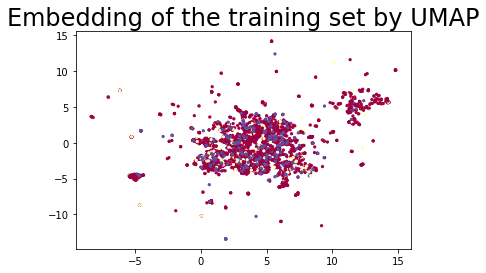

In [501]:
import umap
import matplotlib.pyplot as plt
colors = train_metadata['Label_number']
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(train_data)  # norm_train
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=colors, cmap='Spectral')  # c=y_train
plt.rcParams['figure.figsize'] = (10,3)
plt.title('Embedding of the training set by UMAP', fontsize=24)

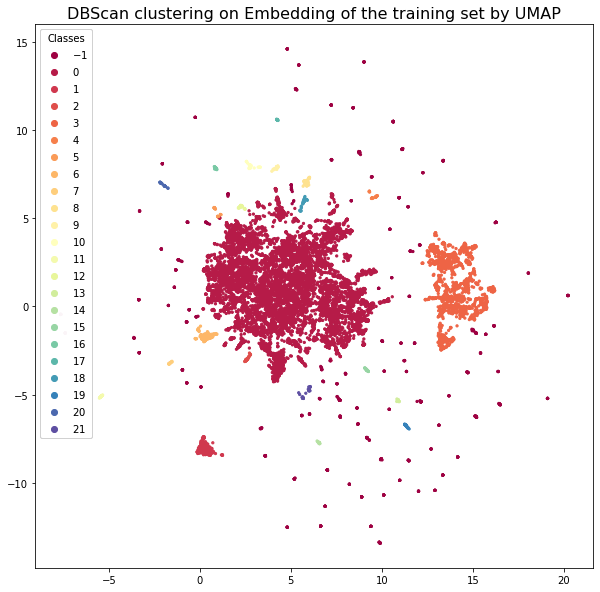


==============================Exploring cluster 0 of size 10412============================
REPRESENTATIVE POINT LOCATION:  [4.9207535 3.6912024]
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ('D4T',)
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ('103',)  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ('103',)  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nnRTI  | Cluster:  0  | Rep. Mutation Positions:  ('184',)  | Cocktail:  ('3TC', 'ABC', 'AZT')
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ('D4T', 'DDI')
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()

==============================Ex

In [59]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=.5, min_samples=30).fit(trans.embedding_)

plt.rcParams['figure.figsize'] = (10,10)
fig, ax = plt.subplots()
scatter = ax.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=clustering.labels_, cmap='Spectral')
legend1 = ax.legend(*scatter.legend_elements(num=len(set(clustering.labels_))), loc="best", title="Classes")
ax.add_artist(legend1)
# ax.set(facecolor = "black")
plt.title('DBScan clustering on Embedding of the training set by UMAP', fontsize=16);
plt.show()

plt.rcParams['figure.figsize'] = (10,3)

# pick some samples to decode
visitedClusters = []
num_show = 10
for core_index in clustering.core_sample_indices_:
    cluster = clustering.labels_[core_index]
    if cluster in visitedClusters:   #norm_metadata
        continue
    visitedClusters.append(cluster)
    print(f"\n==============================Exploring cluster {cluster} of size {len([i for i in clustering.labels_ if i == cluster])}============================")

    midpoint = trans.embedding_[core_index]

    # find closest points to midpoint
    points = np.array(trans.embedding_)
    distances = np.linalg.norm(points - np.array([midpoint]), axis=1)
    close_indices = np.argsort(distances)[0:num_show]
    closest = np.array([points[i] for i in close_indices])
    distances = sorted(distances)


    # scatter = plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=clustering.labels_, cmap='Spectral')
    # plt.title(f'DBScan clustering on Embedding of the training set by UMAP - Cluster {cluster}', fontsize=16);
    # plt.figure(figsize=(300,300))
    # plt.show()

    # print metadata for each close point
    print("REPRESENTATIVE POINT LOCATION: ", midpoint)
    for i in range(0,len(closest)): 
        row = train_metadata.iloc[close_indices[i]]   # #norm_metadata
        print("Label: ", row['Label'], " | Cluster: ", clustering.labels_[close_indices[i]], " | Rep. Mutation Positions: ", row['Positions mutated'],  " | Cocktail: ", row['Cocktail'])
        

In [60]:
seen = {}
for i in range(len(clustering.labels_)):
    cluster = clustering.labels_[i]
    if cluster not in seen:
        seen[cluster] = []
    seq = train_metadata.iloc[i]['Sequence']  # norm_metadata  
    seen[cluster].append((i, seq))

for cluster in seen.keys():
    print(f"Number of sequences in cluster {cluster}: {len(seen[cluster])}")

Number of sequences in cluster 0: 10412
Number of sequences in cluster -1: 949
Number of sequences in cluster 1: 383
Number of sequences in cluster 2: 52
Number of sequences in cluster 3: 2008
Number of sequences in cluster 4: 30
Number of sequences in cluster 5: 33
Number of sequences in cluster 18: 44
Number of sequences in cluster 6: 138
Number of sequences in cluster 21: 45
Number of sequences in cluster 7: 32
Number of sequences in cluster 8: 68
Number of sequences in cluster 9: 37
Number of sequences in cluster 10: 54
Number of sequences in cluster 11: 43
Number of sequences in cluster 12: 45
Number of sequences in cluster 13: 48
Number of sequences in cluster 14: 32
Number of sequences in cluster 15: 36
Number of sequences in cluster 16: 38
Number of sequences in cluster 17: 35
Number of sequences in cluster 19: 43
Number of sequences in cluster 20: 46


In [560]:
def get_cluster_mutation_distributions(clustering, metadata):
    cluster_mut_freqs = [{} for i in range(max(clustering.labels_)+1)] 
    cluster_med_freqs = [{} for i in range(max(clustering.labels_)+1)] 
    
    for mut in representative_mutations.keys():
        for clust in cluster_mut_freqs:
            clust[mut] = 0
    for i in range(len(clustering.labels_)):
        cluster = clustering.labels_[i]
        if cluster < 0:
            continue
            
        cocktail = np.array(metadata.iloc[i]['Cocktail'])  # # norm_metadata   
        for med in cocktail:
            if med in cluster_med_freqs[cluster]:
                cluster_med_freqs[cluster][med] += 1
            else:
                cluster_med_freqs[cluster][med] = 1
                
        seq = metadata.iloc[i]['Sequence']    # norm_metadata   
            
#         _, mutations = get_represented_drugs(reference, seq)
        mutations = get_mutations(reference, seq)
        for mutation in mutations:
            if mutation in cluster_mut_freqs[cluster]:
                cluster_mut_freqs[cluster][mutation] += 1
            else:
                cluster_mut_freqs[cluster][mutation] = 1
            
    return cluster_mut_freqs, cluster_med_freqs
        
    
import collections

def plot_cluster_mutation_distributions(clustering, metadata, seen):
    cluster_mut_freqs, cluster_med_freqs = get_cluster_mutation_distributions(clustering, metadata)
    
    # Figure out which mutations to keep (must be above 1/3 frequency)
    keep = []
    for mut_freqs in cluster_mut_freqs:
        max_value = max(mut_freqs.values())
        min_freq = int(0.3 * max_value) + 3
        for key in mut_freqs.keys():
            if mut_freqs[key] > min_freq:
                keep.append(key)
                
    # Set key to 0 for non-present mutations
    for mut_freqs in cluster_mut_freqs:
        for key in keep:
            if key not in mut_freqs:
                mut_freqs[key] = 0
        # scale frequencies
        max_value = max(mut_freqs.values()) if max(mut_freqs.values()) > 0 else 1
        for key in mut_freqs:
            mut_freqs[key] /= max_value
                
                
    all_meds = [med for meds in cluster_med_freqs for med in meds.keys()]
    # Set key to 0 for non-present medications
    for med_freqs in cluster_med_freqs:
        for key in all_meds:
            if key not in med_freqs:
                med_freqs[key] = 0
        # scale frequencies
        max_value = max(med_freqs.values()) if max(med_freqs.values()) > 0 else 1
        for key in med_freqs:
            med_freqs[key] /= max_value
            
            
    
    i = -1
    fig, ax = plt.subplots(len(cluster_mut_freqs), 2, figsize=(40,40))
    fig.tight_layout()
    
    for mut_freqs, med_freqs in zip(cluster_mut_freqs, cluster_med_freqs):
        i += 1
        filter_over_5 = {k:v for k,v in mut_freqs.items() if k in keep and int(k) < 230} 
        number = {k:int(k) for k in mut_freqs.keys()}
        ks = sorted(filter_over_5, key=number.__getitem__)
        vals = [filter_over_5[k] for k in ks]

        plt.xticks(rotation='vertical')
        cluster = cluster_mut_freqs.index(mut_freqs)
        ax[i, 0].set_title(f"Frequency of mutations in cluster {cluster} with {len(seen[cluster])} sequences")
        ax[i, 0].bar(ks, vals, color='g')
        
        ks = sorted(med_freqs.keys())
        vals = [med_freqs[k] for k in ks]        
        ax[i, 1].set_title(f"Frequency of known prescribed medicines in cluster {cluster_mut_freqs.index(mut_freqs)}")
        ax[i, 1].set_ylim(0,1.0)
        ax[i, 1].bar(ks, vals, color='g')


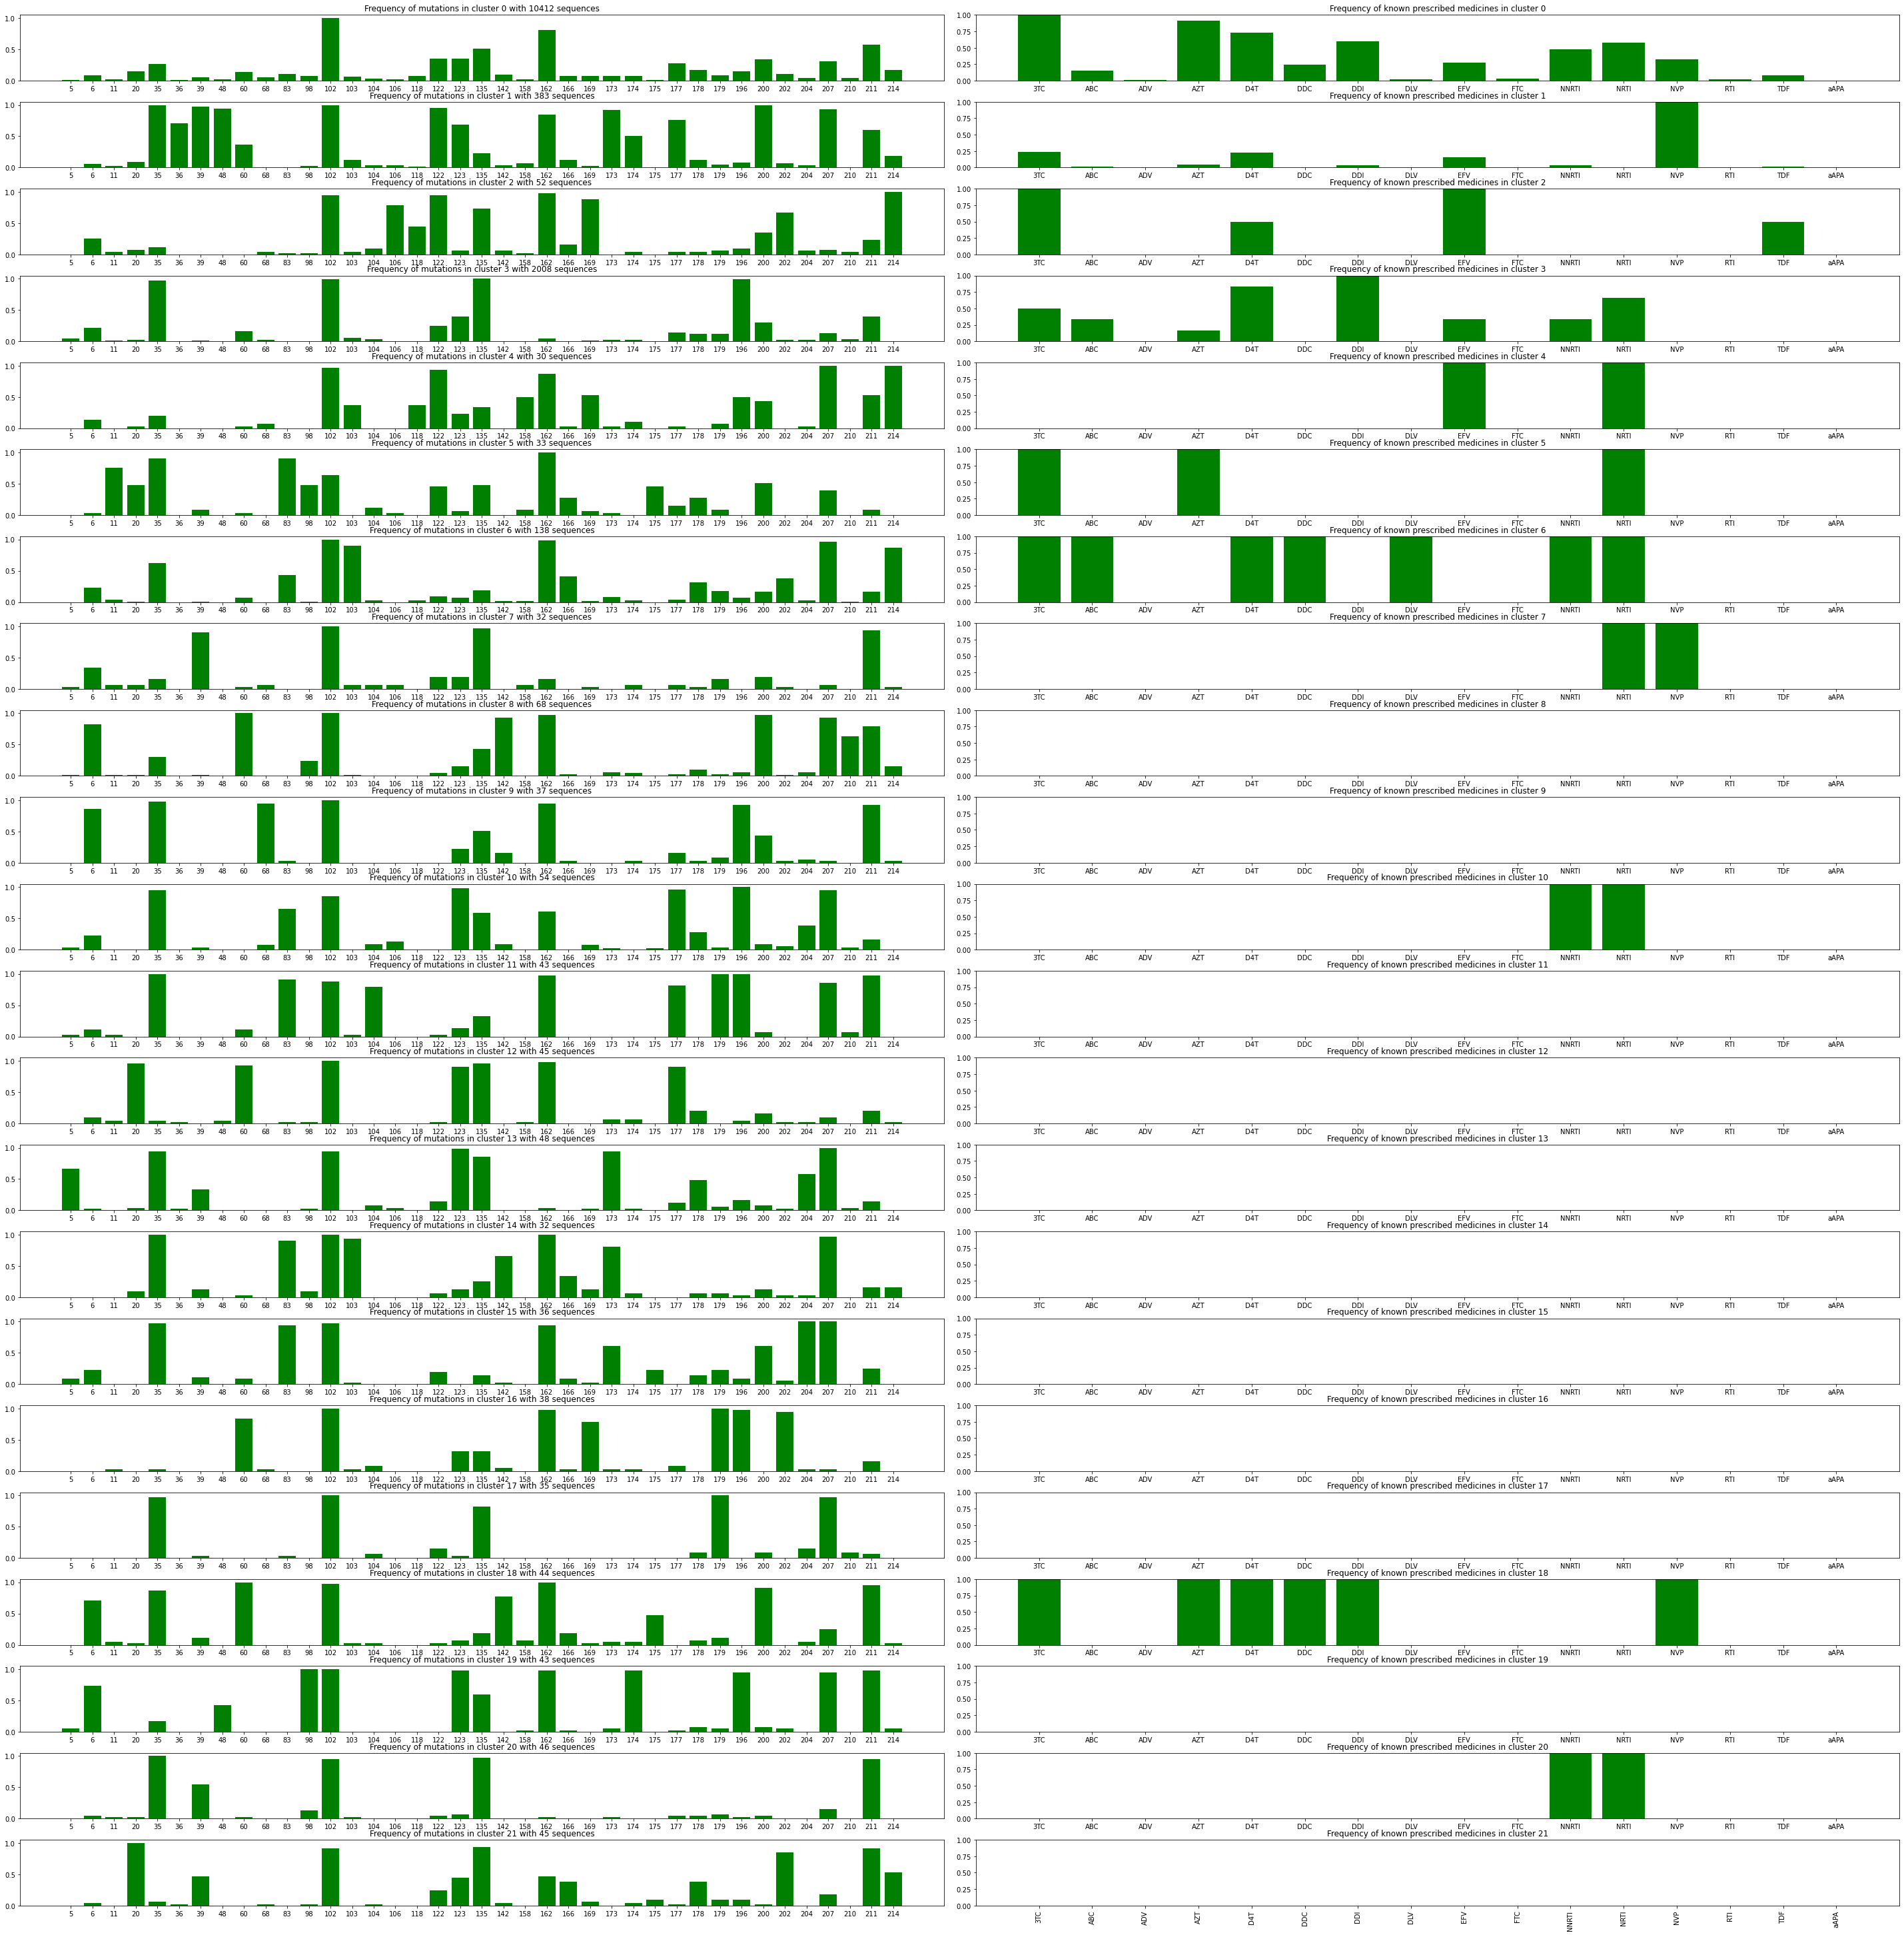

In [561]:
plot_cluster_mutation_distributions(clustering, train_metadata, seen)

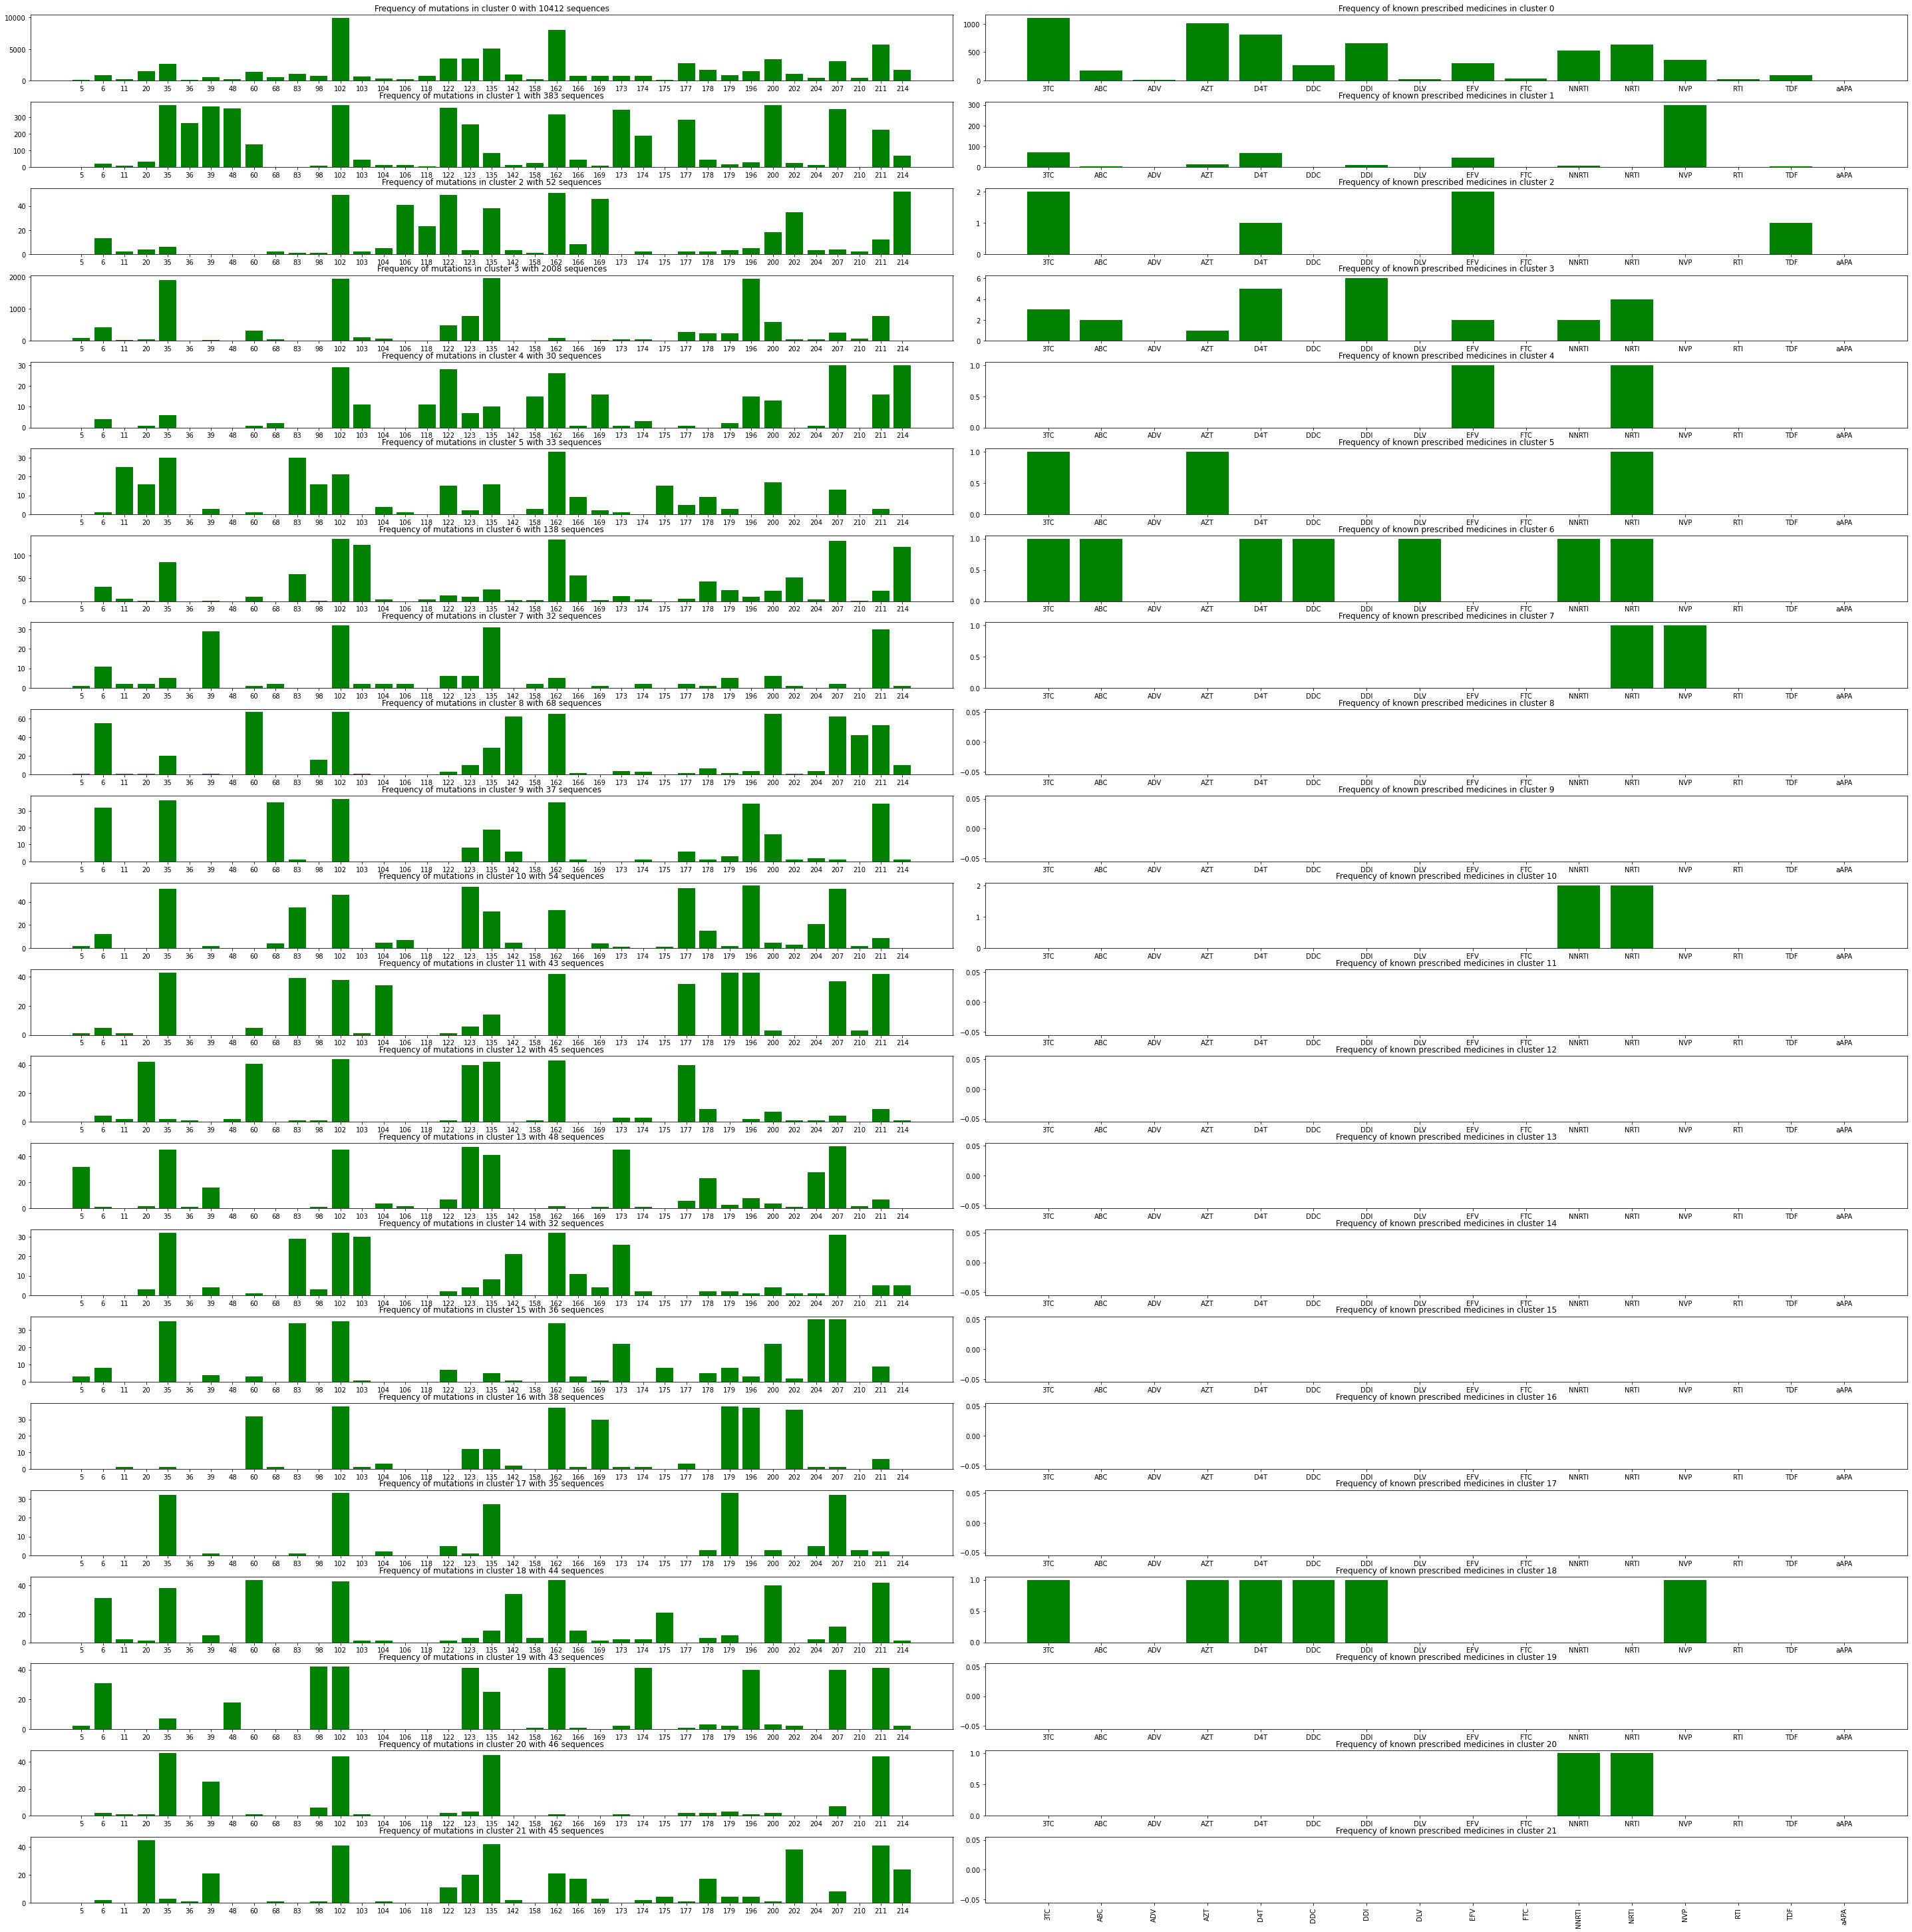

In [151]:
plot_cluster_mutation_distributions(clustering, train_metadata, seen)
# get_cluster_mutation_distributions(clustering, train_metadata)[1]

In [109]:
def explore_cluster(cl_i, metadata):
    print("===========Representative sequence from each study in this cluster===============\n")
    info = []
    studies = set()
    patients = set()
    for i, seq in seen[cl_i]:
        all_mut = get_mutations(reference, seq)
        drugs, rep_mut = get_represented_drugs(reference, seq)
        non_rep_muts = sorted([int(mut) for mut in all_mut if mut not in rep_mut])
        cocktail = metadata.iloc[i]['Cocktail']  
        meta = metadata.iloc[i]['Patient info']  
        dash = metadata.iloc[i]['Dash count'] 
        
        study = re.split("_", meta)[0]
        patient = re.split("_", meta)[1]
        patients.add(patient)
        if study not in studies:
            studies.add(study)
#             print(metadata.iloc[i]['Sequence'], '\n')     # uncomment to view smaple sequence for each study
        
        info.append([meta, drugs, rep_mut, non_rep_muts, cocktail, dash])
    info = pd.DataFrame(info, columns=['Patient info', 'Rep. Mutation Type', 'Representative mutations', 'Other mutations', 'Cocktail', 'Dash count'])
    print(f"{len(studies)} different studies observed in this cluster", studies, "\n")
    print(f"{len(patients)} different patients observed in this cluster: ") #, patients, "\n")
    return info

info = explore_cluster(5, train_metadata)  # norm_metadata
pd.set_option('display.max_colwidth', None)
info.head() #clusters 4, 5, 8, 

===========Representative sequence from each study in this cluster===============

7 different studies observed in this cluster {'>1025', '>2394', '>2335', '>2576', '>1944', '>2073', '>1696'} 

33 different patients observed in this cluster: 


,Patient info,Rep. Mutation Type,Representative mutations,Other mutations,Cocktail,Dash count
0,">1025_15212_GART-80_1998_B__3TC,AZT,NRTI,None",[TAM],[184],"[20, 35, 83, 98, 102, 135, 138, 162, 245]","(3TC, AZT, NRTI)",0
1,>1696_60455_TW9140_2005_B__None,"[TAM, TAM, nnRTI, nnRTI]","[67, 70, 101, 190]","[11, 35, 75, 83, 112, 162, 163, 175, 178, 194, 200, 207, 219, 228, 245]",(),0
2,>1696_60519_TW0331a_2001_B__None,[],[],"[11, 35, 39, 83, 102, 111, 114, 162, 166, 175, 179, 200, 211, 245]",(),0
3,>1696_60580_TW0400a_2002_B__None,[],[],"[11, 35, 64, 83, 104, 162, 175, 178, 200, 207, 245]",(),0
4,>1696_60641_TW8477a_2000_B__None,[],[],"[35, 83, 122, 162, 166, 173, 175, 200, 245]",(),0


# Compute homogeneity index

In [609]:
# Idea: for each cluster, need prop (total # of mutations or drugs w freq > 50%) / (total # mutated positions or drugs observed)

cluster_mut_freqsh, cluster_med_freqsh = get_cluster_mutation_distributions(clustering, train_metadata)

i = 0
for med_freqh in cluster_med_freqsh:
    # for each cluster
    max_valueh = max(med_freqh.values()) if med_freqh.values() else 0
    total_drugs_over_50 = len([key for key in med_freqh.keys() if med_freqh[key] > max_valueh * 0.5])
    # total_drugs_over_10 = len([key for key in med_freqh.keys() if med_freqh[key] > max_valueh * 0.1])
    total_drugs = len(med_freqh.keys())
    index = total_drugs_over_50 / total_drugs if total_drugs > 0 else 1.0
    print(f"Homogeneity of drugs for cluster {i}:", index)
    i += 1

Homogeneity of drugs for cluster 0: 0.3125
Homogeneity of drugs for cluster 1: 0.09090909090909091
Homogeneity of drugs for cluster 2: 0.5
Homogeneity of drugs for cluster 3: 0.375
Homogeneity of drugs for cluster 4: 1.0
Homogeneity of drugs for cluster 5: 1.0
Homogeneity of drugs for cluster 6: 1.0
Homogeneity of drugs for cluster 7: 1.0
Homogeneity of drugs for cluster 8: 1.0
Homogeneity of drugs for cluster 9: 1.0
Homogeneity of drugs for cluster 10: 1.0
Homogeneity of drugs for cluster 11: 1.0
Homogeneity of drugs for cluster 12: 1.0
Homogeneity of drugs for cluster 13: 1.0
Homogeneity of drugs for cluster 14: 1.0
Homogeneity of drugs for cluster 15: 1.0
Homogeneity of drugs for cluster 16: 1.0
Homogeneity of drugs for cluster 17: 1.0
Homogeneity of drugs for cluster 18: 1.0
Homogeneity of drugs for cluster 19: 1.0
Homogeneity of drugs for cluster 20: 1.0
Homogeneity of drugs for cluster 21: 1.0


In [551]:
# Idea: for each cluster, need prop (total # of mutations w freq > 50%) / (total # mutated positions observed)

i = 0
for mut_freqh in cluster_mut_freqsh:
    # for each cluster
    max_valueh = max(mut_freqh.values()) if mut_freqh.values() else 0
    total_muts_over_50 = len([key for key in mut_freqh.keys() if mut_freqh[key] > max_valueh * 0.5])
    total_muts = len(mut_freqh.keys())
    index = total_muts_over_50 / total_muts if total_muts > 0 else 1.0
    print(f"Homogeneity of mutations for cluster {i}:", index)
    # print(index)
    i += 1

Homogeneity of mutations for cluster 0: 0.009456264775413711
Homogeneity of mutations for cluster 1: 0.07142857142857142
Homogeneity of mutations for cluster 2: 0.09782608695652174
Homogeneity of mutations for cluster 3: 0.018691588785046728
Homogeneity of mutations for cluster 4: 0.12121212121212122
Homogeneity of mutations for cluster 5: 0.12280701754385964
Homogeneity of mutations for cluster 6: 0.06741573033707865
Homogeneity of mutations for cluster 7: 0.07142857142857142
Homogeneity of mutations for cluster 8: 0.14285714285714285
Homogeneity of mutations for cluster 9: 0.17777777777777778
Homogeneity of mutations for cluster 10: 0.15
Homogeneity of mutations for cluster 11: 0.25
Homogeneity of mutations for cluster 12: 0.1320754716981132
Homogeneity of mutations for cluster 13: 0.13559322033898305
Homogeneity of mutations for cluster 14: 0.16981132075471697
Homogeneity of mutations for cluster 15: 0.15384615384615385
Homogeneity of mutations for cluster 16: 0.14285714285714285
Ho

In [590]:
def compute_homogeneity_indexes(metadata):
    cluster_mut_freqs = {} 
    cluster_med_freqs = {} 
    
    for mut in representative_mutations.keys():
        cluster_mut_freqs[mut] = 0
    
    for i in range(0, metadata.shape[0]):
        cocktail = np.array(metadata.iloc[i]['Cocktail'])   
        for med in cocktail:
            if med in cluster_med_freqs:
                cluster_med_freqs[med] += 1
            else:
                cluster_med_freqs[med] = 1

        seq = metadata.iloc[i]['Sequence']    # norm_metadata   

        mutations = get_mutations(reference, seq)
        for mutation in mutations:
            if mutation in cluster_mut_freqs:
                cluster_mut_freqs[mutation] += 1
            else:
                cluster_mut_freqs[mutation] = 1
            
    i = 0
    med_index = 0
    med_freqh = cluster_med_freqs
    # for each cluster
    max_valueh = max(med_freqh.values()) if med_freqh.values() else 0
    total_drugs_over_50 = len([key for key in med_freqh.keys() if med_freqh[key] > max_valueh * 0.5])
    total_drugs = len(med_freqh.keys())
    med_index = total_drugs_over_50 / total_drugs if total_drugs > 0 else 1.0
    print(f"Homogeneity of drugs for cluster {i}:", med_index)
        
    mut_index = 0
    mut_freqh = cluster_mut_freqs
    # for each cluster
    max_valueh = max(mut_freqh.values()) if mut_freqh.values() else 0
    total_muts_over_50 = len([key for key in mut_freqh.keys() if mut_freqh[key] > max_valueh * 0.5])
    total_muts = len(mut_freqh.keys())
    mut_index = total_muts_over_50 / total_muts if total_muts > 0 else 1.0
    print(f"Homogeneity of mutations for cluster {i}:", mut_index)
    # print(index)
        
    return mut_index, med_index
    

# Look deeper into large clusters

Text(0.5, 1.0, 'Embedding of the training set by UMAP')

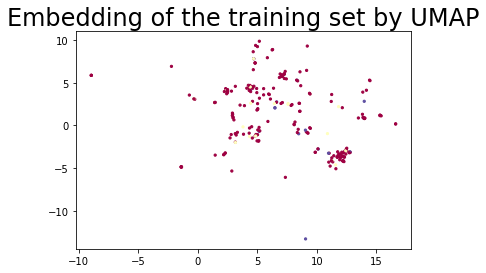

In [511]:
CLUSTER = 3

cluster1 = []
cluster1_metadata = []
indices = [index for (index, seq) in seen[CLUSTER]]
for ind in indices:
    cluster1_metadata.append(train_metadata.iloc[ind])  #norm_metadata
    cluster1.append(train_data.iloc[ind])  # norm_train

cluster1 = pd.DataFrame(cluster1)
cluster1_metadata = pd.DataFrame(cluster1_metadata)

colors = cluster1_metadata['Label_number']
trans = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=42).fit(cluster1)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=colors, cmap='Spectral')  # c=y_train
plt.title('Embedding of the training set by UMAP', fontsize=24)


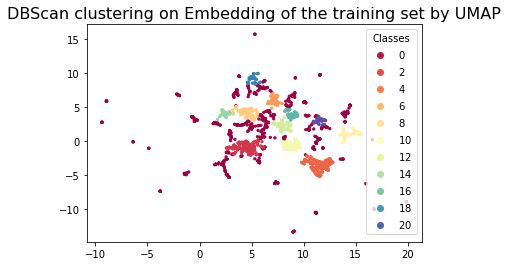

<Figure size 21600x21600 with 0 Axes>


==============================Exploring cluster 0============================
REPRESENTATIVE POINT LOCATION:  [ 4.3553243 -1.2991021]
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()


IndexError: single positional indexer is out-of-bounds

In [665]:
from sklearn.cluster import DBSCAN
sub_clustering = DBSCAN(eps=.7, min_samples=40).fit(trans.embedding_)


plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=sub_clustering.labels_, cmap='Spectral')
plt.legend(*scatter.legend_elements(num=len(set(sub_clustering.labels_))), loc="best", title="Classes")
plt.title('DBScan clustering on Embedding of the training set by UMAP', fontsize=16);
plt.figure(figsize=(300,300))
plt.show()

# pick some samples to decode
visitedClusters = []
num_show = 10
for core_index in sub_clustering.core_sample_indices_:
    cluster = sub_clustering.labels_[core_index]
    if cluster in visitedClusters:  # or not cluster1_metadata.iloc[core_index]['Cocktail']:
        continue
    visitedClusters.append(cluster)
    print(f"\n==============================Exploring cluster {cluster}============================")

    midpoint = trans.embedding_[core_index]

    # find closest points to midpoint
    points = np.array(trans.embedding_)
    distances = np.linalg.norm(points - np.array([midpoint]), axis=1)
    close_indices = np.argsort(distances)[0:num_show]
    closest = np.array([points[i] for i in close_indices])
    distances = sorted(distances)

    # print metadata for each close point
    print("REPRESENTATIVE POINT LOCATION: ", midpoint)
    for i in range(0,len(closest)): 
        row = cluster1_metadata.iloc[close_indices[i]]
        print("Label: ", row['Label'], " | Cluster: ", sub_clustering.labels_[close_indices[i]], " | Rep. Mutation Positions: ", row['Positions mutated'],  " | Cocktail: ", row['Cocktail'])
        

In [525]:
seen_sub = {}
for i in range(len(sub_clustering.labels_)):
    cluster = sub_clustering.labels_[i]
    if cluster not in seen_sub:
        seen_sub[cluster] = []
    seq = train_metadata.iloc[i]['Sequence']   
    seen_sub[cluster].append((i, seq))


for cluster in sorted(seen_sub.keys()):
    print(f"Number of sequences in cluster {cluster}: {len(seen_sub[cluster])}")

new_clust = sub_clustering

Number of sequences in cluster -1: 782
Number of sequences in cluster 0: 236
Number of sequences in cluster 1: 209
Number of sequences in cluster 2: 89
Number of sequences in cluster 3: 135
Number of sequences in cluster 4: 114
Number of sequences in cluster 5: 113
Number of sequences in cluster 6: 97
Number of sequences in cluster 7: 59
Number of sequences in cluster 8: 67
Number of sequences in cluster 9: 64
Number of sequences in cluster 10: 43


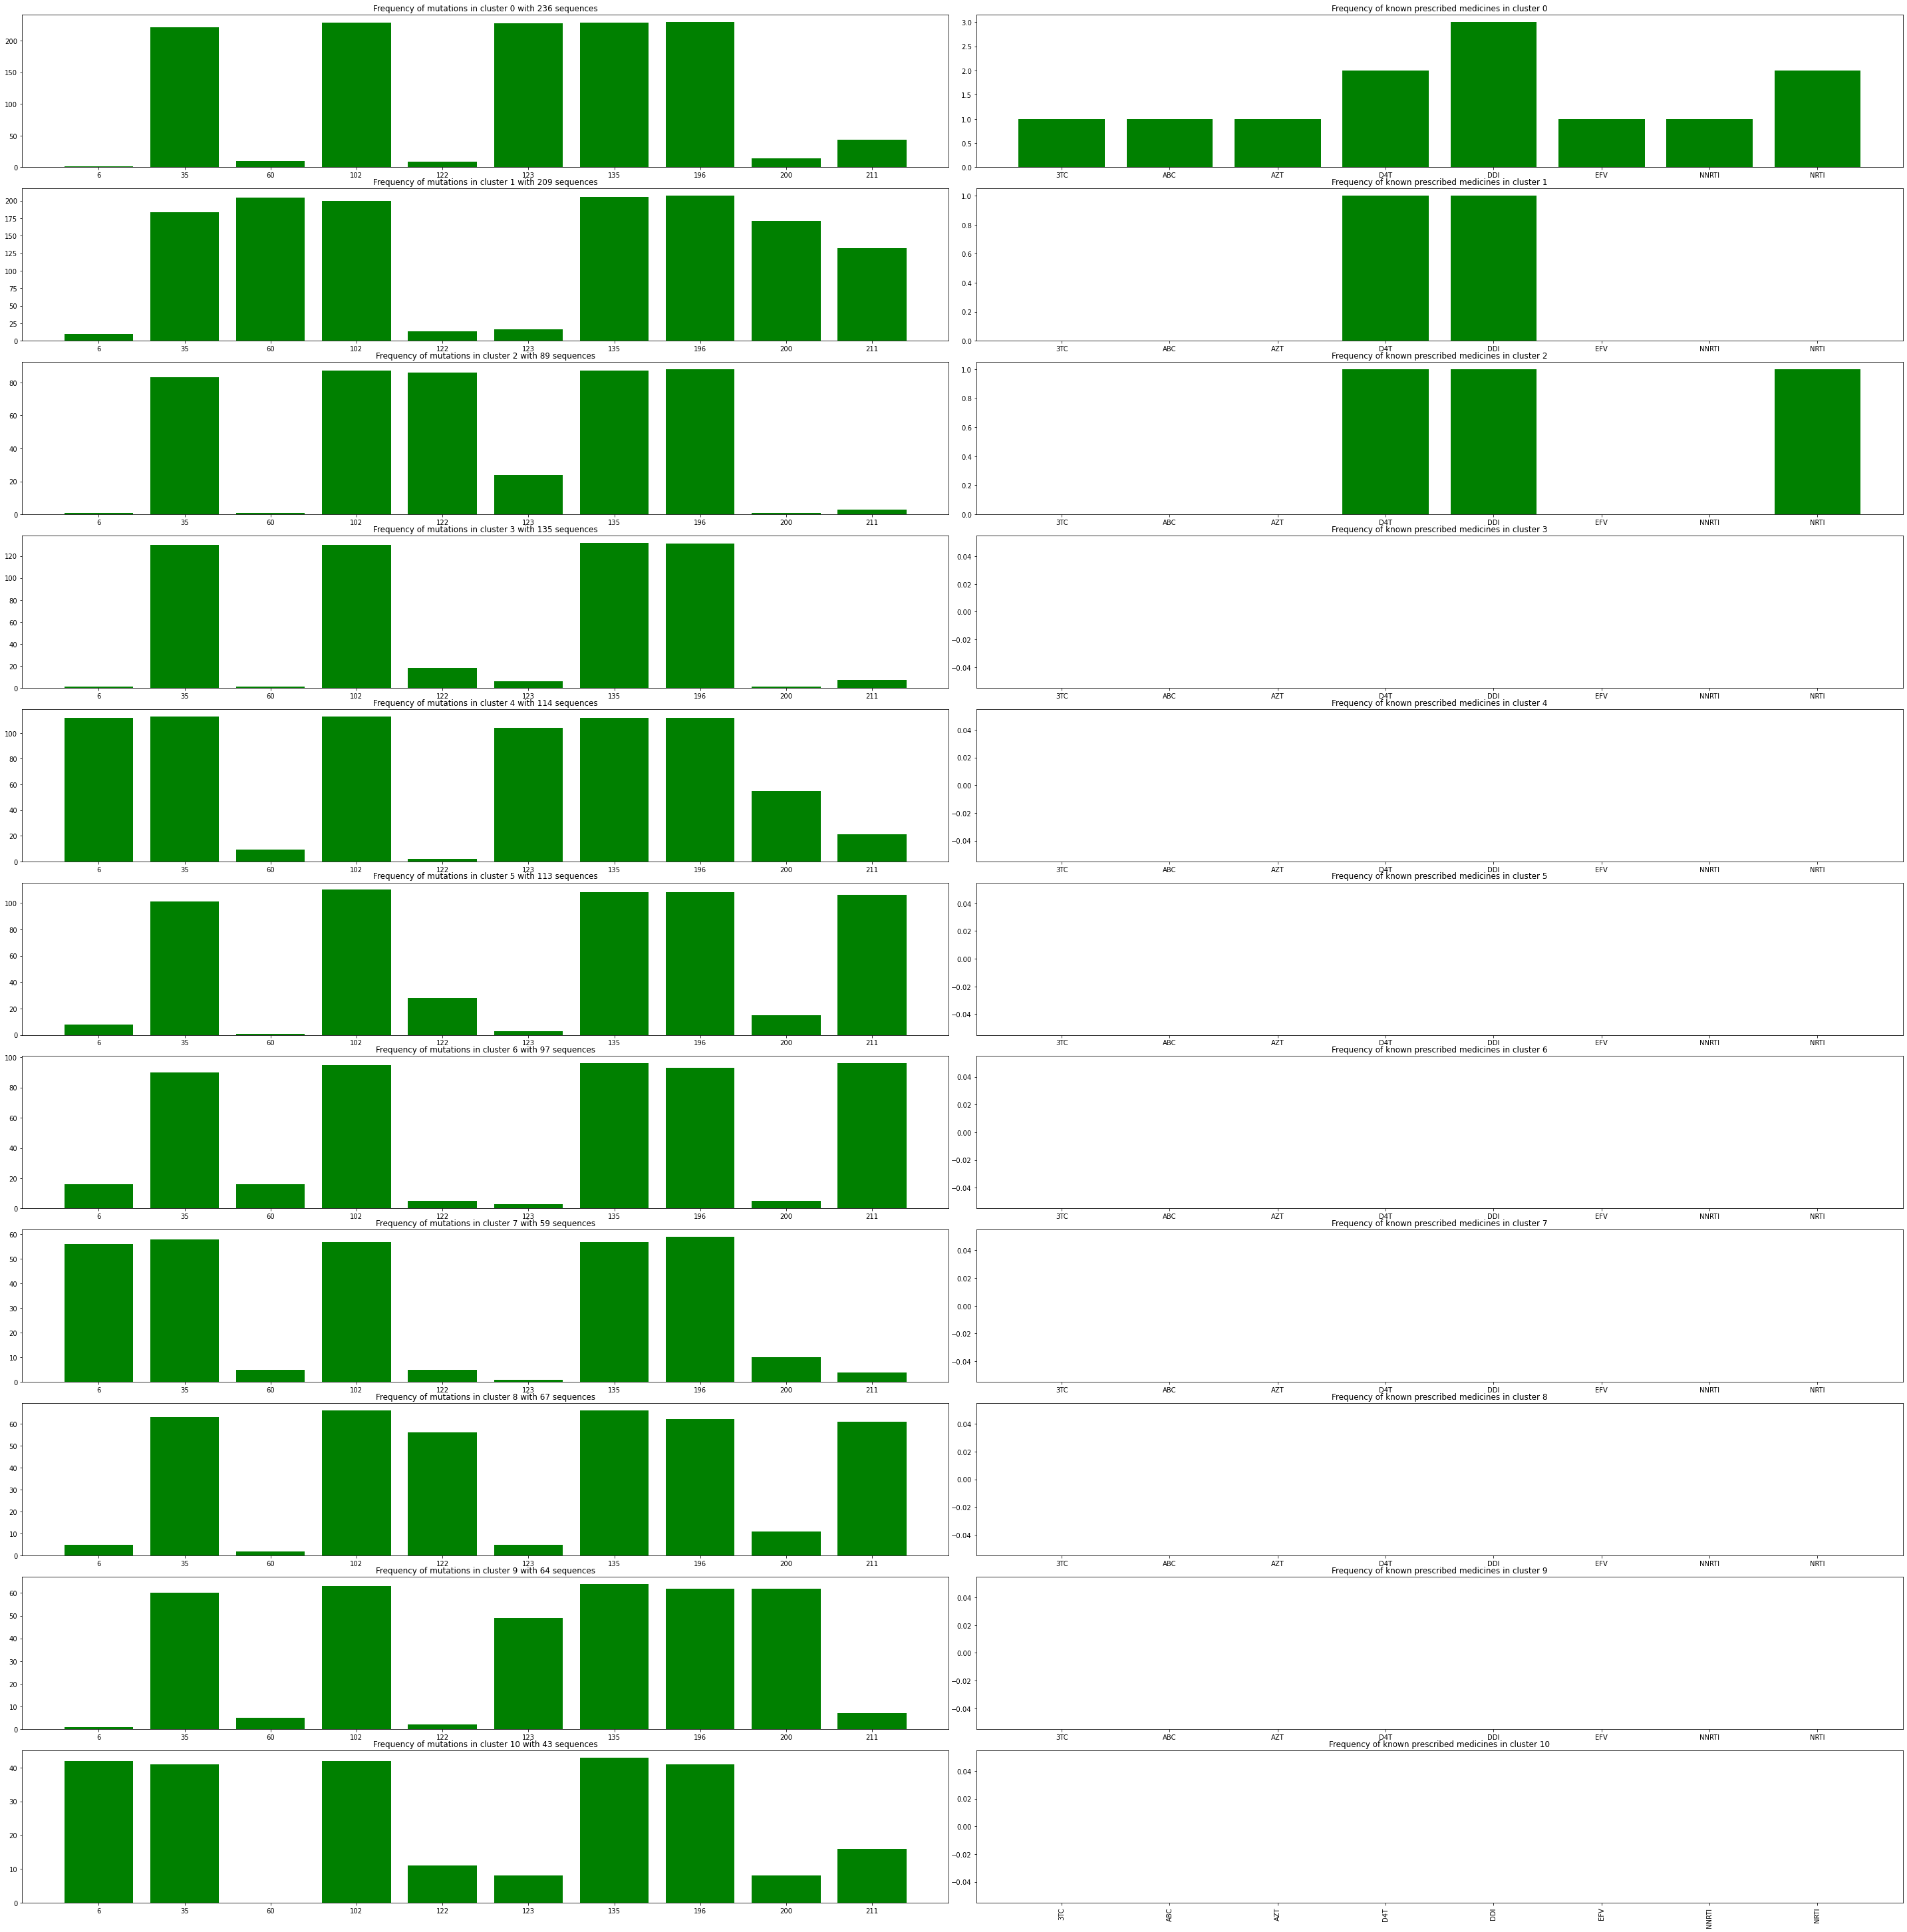

In [526]:
plot_cluster_mutation_distributions(sub_clustering, cluster1_metadata, seen_sub)

# Analyze results with phylogenetic trees

In [53]:
# Importing necessary libraries from BioPython
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [54]:
train_metadata.shape[0] / 17

861.8235294117648

In [624]:
CLUSTER = 3
import random 
from Bio import SeqIO
import statistics

RANDOM = True  # If computing for a large random cluster (computation done on Google Colab)

for i in range(0, len(seen.keys())):   
    cluster1 = []
    cluster1_metadata = []
    # indices = [index for (index, seq) in seen[i]]
    indices = random.sample(range(1, train_metadata.shape[0]), 50)  # if generating random cluster
    for ind in indices:
        cluster1_metadata.append(train_metadata.iloc[ind])  #norm_metadata
        cluster1.append(train_data.iloc[ind])  # norm_train

    cluster1 = pd.DataFrame(cluster1)
    cluster1_metadata = pd.DataFrame(cluster1_metadata)
    
    # Compute homogeneity indexes
    mut_index, med_index = compute_homogeneity_indexes(cluster1_metadata)
    print(mut_index)
    print(med_index)

    # Construct fasta file 
    patinfo = cluster1_metadata.drop_duplicates(subset=['PatientID'], keep='last')
    with open('phyl.fasta', 'w') as file:
        for seq in patinfo.iterrows():
            stuff = str(seq[1]['Patient info']).replace("_", "")
            file.write(f"{stuff}\n{seq[1].Sequence}\n")
    records = SeqIO.parse("phyl.fasta", "fasta")
    count = SeqIO.write(records, "phyl.phy", "phylip")
    print("Converted %i records" % count)

    # Read the sequences and align
    align = AlignIO.read('phyl.phy','phylip')
    
    if RANDOM:
        break

    # Calculate the distance matrix
    calculator = DistanceCalculator('identity')
    distMatrix = calculator.get_distance(align)

    # Create a DistanceTreeConstructor object
    constructor = DistanceTreeConstructor()
    # Construct the phlyogenetic tree using UPGMA algorithm
    UPGMATree = constructor.upgma(distMatrix)

    # Draw the phlyogenetic tree
    # Phylo.draw(UPGMATree)

    print(f"Max UPGMPA tree depth for cluster {i}: {max(UPGMATree.depths().values())}")
    print(f"Average UPGMPA tree depth for cluster {i}: {statistics.mean(UPGMATree.depths().values())}")
    



Homogeneity of drugs for cluster 0: 0.5714285714285714
Homogeneity of mutations for cluster 0: 0.05063291139240506
0.05063291139240506
0.5714285714285714
Converted 50 records


# Analyze by training classification network 
## Sequences -> clusters

In [372]:
%matplotlib inline
import pandas as pd

In [352]:
np.array(train_metadata.iloc[1000].Cocktail)

array(['3TC', 'AZT', 'D4T', 'DDC', 'DDI', 'NVP'], dtype='<U3')

In [409]:
drugs = set()
for i in range(len(clustering.labels_)):
    c = train_metadata.iloc[i]['Cocktail']
    for drug in c:
        drugs.add(drug)
index = enumerate(drugs)
for i,j in index:
    print(i,j)


0 RPV
1 DDI
2 AZT
3 aAPA
4 NRTI
5 ADV
6 3TC
7 NVP
8 DLV
9 FTC
10 TDF
11 RTI
12 EFV
13 D4T
14 ABC
15 DDC
16 NNRTI


In [412]:
seqs = []
# metas = []
clusts = [] 
df = pd.DataFrame()
cs = {} # Cocktails {Drug: [1 0 0 0..], Drug2: [1 0 0 0 1..], ...}

for i in range(len(clustering.labels_)):
    cluster = clustering.labels_[i]
    c = train_metadata.iloc[i]['Cocktail']
    for drug in drugs:
        if drug not in cs:
            cs[drug] = []
        hasd = 1 if drug in c else 0
        cs[drug].append(hasd)
    clusts.append(cluster)
        

In [416]:
df = train_data.copy()
for drug in drugs:
    df[f'{drug}'] = cs[drug]
df['Cluster'] = clusts
# df['Metadata'] = metas
df = df[df.Cluster != -1]
df.head()

,0_A,0_F,0_H,0_L,0_P,0_R,0_S,0_T,0_Y,1_F,...,DLV,FTC,TDF,RTI,EFV,D4T,ABC,DDC,NNRTI,Cluster
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [417]:
df.to_csv('data.csv')

In [418]:
drugs

{'3TC',
 'ABC',
 'ADV',
 'AZT',
 'D4T',
 'DDC',
 'DDI',
 'DLV',
 'EFV',
 'FTC',
 'NNRTI',
 'NRTI',
 'NVP',
 'RPV',
 'RTI',
 'TDF',
 'aAPA'}

In [420]:
#

In [421]:
# hi

In [509]:
seen.keys()

dict_keys([0, -1, 1, 2, 3, 4, 5, 18, 6, 21, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20])